# To run this successfully, run every cell from top to bottom

### Note: Every cell has already been run by me, and results are shown, so there is no need to actually run everything.

In [108]:
# For the purpose of this project, I used a dataset I found in Kaggle, called "Fashion-MNIST" which is a slight
# variation to the commonly known MNIST dataset. I decided to use the "Fashion-MNIST" dataset just to differ from 
# the others hehe.

In [109]:
# Here we import all the need libraries

import pandas as pd
import numpy as np
import heapq
import timeit

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import classification_report

In [110]:
# Load the datasets from the FashionMNIST folder.

data_train = pd.read_csv("./FashionMNIST/fashion-mnist_train.csv")
data_test = pd.read_csv("./FashionMNIST/fashion-mnist_test.csv")


In [111]:
# Dictionary to indicate which class number corresponds to which type of clothing

fashionmnist = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot",
}

In [112]:
# Representation of how the dataset looks like.

data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Split the train and test dataframes into features(X) and labels(Y)

X_train = data_train.drop(["label"],axis=1)
Y_train = data_train[["label"]].values.ravel()
X_test = data_test.drop(["label"],axis=1)
Y_test = data_test[["label"]].values.ravel()

# I used .ravel() due to some inconsistences with the dataset (..Thanks StackOverflow :D)

# Also, since all features range from 0 to 255, we don't need to normalize them.

In [114]:
# We can look at how many rows and columns each dataset has

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [115]:
# Function to create different kind of sizes for training datasets (For testing purposes)

def create_dataset(size):
    """makes a dataset of size "size", and returns that datasets images and targets
    This is used to make the dataset that will be stored by a model and used in 
    experimenting with different stored dataset sizes
    """
    small_x_train = X_train[:size]
    small_y_train = Y_train[:size]
    
    return small_x_train, small_y_train


In [116]:
# Function to create different kind of sizes for testing datasets (For testing purposes)

def create_test_dataset(size):
    """makes a dataset of size "size", and returns that datasets images and targets
    This is used to make the dataset that will be tested by a model and used in 
    experimenting with different test dataset sizes
    """
    small_x_test = X_test[:size]
    small_y_test = Y_test[:size]
    
    return small_x_test, small_y_test

In [117]:
# Smaller train set of 1000 rows (I put it 60000 for the final project)

small_x_train, small_y_train = create_dataset(60000)

small_x_train.shape, small_y_train.shape

((60000, 784), (60000,))

In [118]:
# Smaller test set of 1000 rows (I put it 10000 for the final project)

small_x_test, small_y_test = create_test_dataset(10000)

small_x_test.shape, small_y_test.shape

((10000, 784), (10000,))

In [119]:
# Import some important libraries and features

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [120]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## READY SVM:

I used the **sklearn**-implemented **Suport Vector Machine** Classifier like this:

svm = SVC()

### Standard SVC()

In [370]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6000
           1       1.00      0.97      0.98      6000
           2       0.85      0.85      0.85      6000
           3       0.90      0.93      0.91      6000
           4       0.84      0.87      0.85      6000
           5       0.98      0.97      0.97      6000
           6       0.79      0.72      0.76      6000
           7       0.95      0.97      0.96      6000
           8       0.98      0.98      0.98      6000
           9       0.98      0.97      0.97      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

Time:  1444.4626169000112


### Kernel = Polynomial

In [371]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6000
           1       1.00      0.97      0.98      6000
           2       0.89      0.85      0.87      6000
           3       0.92      0.92      0.92      6000
           4       0.90      0.84      0.87      6000
           5       0.85      0.98      0.91      6000
           6       0.80      0.79      0.79      6000
           7       0.95      0.92      0.93      6000
           8       0.99      0.96      0.98      6000
           9       0.98      0.96      0.97      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000

Time:  1578.185893700007


### Kernel = Sigmoid

In [329]:
start = timeit.default_timer()

svm = SVC(kernel="sigmoid")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.76      0.17      0.28      1000
           1       0.47      0.84      0.60      1000
           2       0.18      0.47      0.26      1000
           3       0.57      0.39      0.46      1000
           4       0.43      0.14      0.21      1000
           5       0.30      0.50      0.38      1000
           6       0.20      0.03      0.04      1000
           7       0.77      0.78      0.78      1000
           8       0.29      0.22      0.25      1000
           9       0.74      0.59      0.66      1000

    accuracy                           0.41     10000
   macro avg       0.47      0.41      0.39     10000
weighted avg       0.47      0.41      0.39     10000

Time:  7.510436500000651


### Kernel = Polynomial, Degree = 5

In [41]:
start = timeit.default_timer()

svm = SVC(kernel="poly", degree=5)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.82      0.71      0.76      1000
           3       0.90      0.85      0.87      1000
           4       0.85      0.76      0.81      1000
           5       0.64      0.96      0.76      1000
           6       0.67      0.63      0.65      1000
           7       0.92      0.82      0.87      1000
           8       0.97      0.92      0.95      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Time:  1016.8440081999997


### Kernel = Polynomial, Degree = 10

In [42]:
start = timeit.default_timer()

svm = SVC(kernel="poly", degree=10)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1000
           1       0.97      0.93      0.95      1000
           2       0.80      0.65      0.71      1000
           3       0.91      0.75      0.82      1000
           4       0.80      0.74      0.77      1000
           5       0.44      0.96      0.60      1000
           6       0.62      0.56      0.59      1000
           7       0.93      0.66      0.77      1000
           8       0.96      0.87      0.91      1000
           9       0.93      0.91      0.92      1000

    accuracy                           0.77     10000
   macro avg       0.82      0.77      0.78     10000
weighted avg       0.82      0.77      0.78     10000

Time:  1351.371669


### Kernel = Polynomial, gamma = auto

In [18]:
start = timeit.default_timer()

svm = SVC(kernel="poly", gamma='auto')

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.97      0.99      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.89      0.87      0.88      1000
           4       0.83      0.79      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.70      0.67      0.68      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Time:  473.9309395


### Kernel = Polynomial, gamma = scale

In [19]:
start = timeit.default_timer()

svm = SVC(kernel="poly", gamma='scale')

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.77      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.85      0.80      0.83      1000
           5       0.82      0.95      0.88      1000
           6       0.71      0.71      0.71      1000
           7       0.92      0.90      0.91      1000
           8       0.98      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

Time:  761.822964


### SVC with Linear Kernel

In [121]:

start = timeit.default_timer()

linearsvm = LinearSVC()

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.69      0.83      0.76      1000
           1       0.94      0.97      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.90      0.76      0.82      1000
           4       0.68      0.77      0.72      1000
           5       0.87      0.89      0.88      1000
           6       0.63      0.47      0.54      1000
           7       0.91      0.85      0.88      1000
           8       0.93      0.89      0.91      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Time:  348.13980369999626


### SVC with Linear Kernel, primal optimization problem

In [43]:
start = timeit.default_timer()

linearsvm = LinearSVC(dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.94      0.97      0.95      1000
           2       0.77      0.77      0.77      1000
           3       0.84      0.87      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.93      0.89      0.91      1000
           6       0.67      0.56      0.61      1000
           7       0.89      0.92      0.91      1000
           8       0.93      0.92      0.93      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Time:  1962.6203988999987


### SVC with Linear Kernel, penalty = L1, primal optimization problem

In [122]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.92      0.90      0.91      1000
           6       0.66      0.56      0.60      1000
           7       0.89      0.92      0.90      1000
           8       0.93      0.91      0.92      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Time:  1319.9553065


### Different C parameter values

In [363]:
start = timeit.default_timer()

svm = SVC(C=0.1)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.77      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.79      0.84      0.81      1000
           5       0.93      0.92      0.92      1000
           6       0.69      0.56      0.62      1000
           7       0.90      0.89      0.89      1000
           8       0.95      0.96      0.96      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Time:  1081.0637573999993


In [364]:
start = timeit.default_timer()

svm = SVC(C=1)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.97      0.94      0.95      1000
           6       0.74      0.68      0.71      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  693.8754524999968


In [365]:
start = timeit.default_timer()

svm = SVC(C=10)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.98      0.96      0.97      1000
           6       0.79      0.73      0.76      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Time:  596.5014689999953


In [369]:
start = timeit.default_timer()

svm = SVC(C=10000)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.83      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.72      0.75      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Time:  677.207911999998


### Standardization between 0 and 1

In [102]:
# Make data standardized between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)


scaler = MinMaxScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [103]:
print(X_train)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.006098  0.008811     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

### Apply PCA to reduce dimensionality

In [105]:
# I reduce to 200 dimensions here

from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_train = pd.DataFrame(pca.fit_transform(X_train))

X_test = pd.DataFrame(pca.transform(X_test))

In [106]:
# Smaller train set of 1000 rows (I put it 60000 for the final project)

small_x_train, small_y_train = create_dataset(60000)

small_x_train.shape, small_y_train.shape


((60000, 200), (60000,))

In [107]:
# Smaller test set of 1000 rows (I put it 10000 for the final project)

small_x_test, small_y_test = create_test_dataset(10000)

small_x_test.shape, small_y_test.shape

((10000, 200), (10000,))

# Examples of PCA for different dimension number

# *Note*: Do not run, only for reference purposes 

### SVC with reduced dimensions (700)

In [218]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.83      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.94      0.96      1000
           6       0.76      0.69      0.72      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Time:  643.6637876999994


### Kernel = Polynomial with reduced dimensions (700)

In [219]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.97      0.94      0.96      1000
           6       0.69      0.72      0.70      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  785.594507400001


### SVC with Linear Kernel, penalty = L1, primal optimization problem and reduced dimentions (700)

In [220]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.96      0.97      0.96      1000
           2       0.77      0.77      0.77      1000
           3       0.85      0.88      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.93      0.91      0.92      1000
           6       0.67      0.56      0.61      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Time:  1329.8321579000003


### SVC with reduced dimentions (300)

In [225]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.83      0.83      1000
           3       0.89      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.69      0.72      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Time:  282.5068234999999


### Kernel = Polynomial with reduced dimentions (300)

In [226]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.97      0.94      0.96      1000
           6       0.69      0.71      0.70      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  367.292754600001


### SVC with Linear Kernel, penalty = L1, primal optimization problem and reduced dimentions (300)

In [227]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.78      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.93      0.91      0.92      1000
           6       0.69      0.55      0.61      1000
           7       0.90      0.91      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Time:  636.1038329000003


### SVC with reduced dimentions (200)


In [262]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.83      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.94      0.96      1000
           6       0.75      0.69      0.72      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Time:  231.13959690000047


### Kernel = Polynomial with reduced dimentions (200)

In [260]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.90      0.91      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.97      0.94      0.96      1000
           6       0.69      0.71      0.70      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  282.2584868999984


### SVC with Linear Kernel, penalty = L1, primal optimization problem and reduced dimentions (200)


In [261]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.68      0.54      0.60      1000
           7       0.91      0.92      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Time:  451.3557182000004


C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVC with reduced dimentions (100)

In [231]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.83      0.83      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.97      0.94      0.96      1000
           6       0.74      0.67      0.71      1000
           7       0.92      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  134.07889980000073


### Kernel = Polynomial with reduced dimentions (100)

In [232]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.90      0.91      0.90      1000
           4       0.84      0.84      0.84      1000
           5       0.97      0.94      0.95      1000
           6       0.68      0.70      0.69      1000
           7       0.92      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Time:  153.0095939999992


### SVC with Linear Kernel, penalty = L1, primal optimization problem and reduced dimentions (100)


In [233]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.77      0.81      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.67      0.54      0.60      1000
           7       0.91      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.85     10000
weighted avg       0.84      0.85      0.85     10000

Time:  199.2042599999986


C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVC with reduced dimentions (20)

In [237]:
start = timeit.default_timer()

svm = SVC()

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.86      0.89      0.88      1000
           4       0.79      0.82      0.81      1000
           5       0.94      0.91      0.93      1000
           6       0.69      0.61      0.65      1000
           7       0.89      0.90      0.90      1000
           8       0.95      0.97      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Time:  61.614600099997915


### Kernel = Polynomial with reduced dimentions (20)

In [238]:
start = timeit.default_timer()

svm = SVC(kernel="poly")

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.80      0.76      0.78      1000
           3       0.88      0.89      0.89      1000
           4       0.80      0.80      0.80      1000
           5       0.95      0.92      0.93      1000
           6       0.62      0.63      0.63      1000
           7       0.90      0.91      0.90      1000
           8       0.96      0.96      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Time:  48.44426899999962


### SVC with Linear Kernel, penalty = L1, primal optimization problem and reduced dimentions (20)


In [239]:
start = timeit.default_timer()

linearsvm = LinearSVC(penalty="l1", dual=False)

linearsvm.fit(small_x_train,small_y_train)

pred = linearsvm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.72      0.79      0.76      1000
           1       0.94      0.94      0.94      1000
           2       0.69      0.69      0.69      1000
           3       0.77      0.85      0.81      1000
           4       0.66      0.80      0.72      1000
           5       0.83      0.86      0.85      1000
           6       0.63      0.30      0.41      1000
           7       0.86      0.82      0.84      1000
           8       0.90      0.93      0.92      1000
           9       0.87      0.92      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000

Time:  21.65163460000258


C:\Users\Sotiris\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# You can run again here:



# Best Model: (kernel=rbf, PCA=200, C=10)




In [81]:
start = timeit.default_timer()

svm = SVC(kernel='rbf',C=10,random_state=42)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_test)

print(classification_report(small_y_test, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.84      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.96      0.97      1000
           6       0.80      0.73      0.76      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Time:  203.42373490000045


### Confusion Matrix on test set prediction

In [78]:
print(confusion_matrix(small_y_test, pred))

[[880   0  17  19   0   1  77   0   6   0]
 [  4 982   2  11   0   0   1   0   0   0]
 [ 14   1 840  16  74   0  52   0   3   0]
 [ 23   8   9 923  23   0  13   0   1   0]
 [  1   0  55  25 876   0  42   0   1   0]
 [  0   0   0   0   0 962   1  25   3   9]
 [125   0  67  23  46   0 732   0   7   0]
 [  0   0   0   0   0  11   0 958   0  31]
 [  5   0   4   1   1   1   2   1 984   1]
 [  0   0   0   0   0   3   0  30   0 967]]


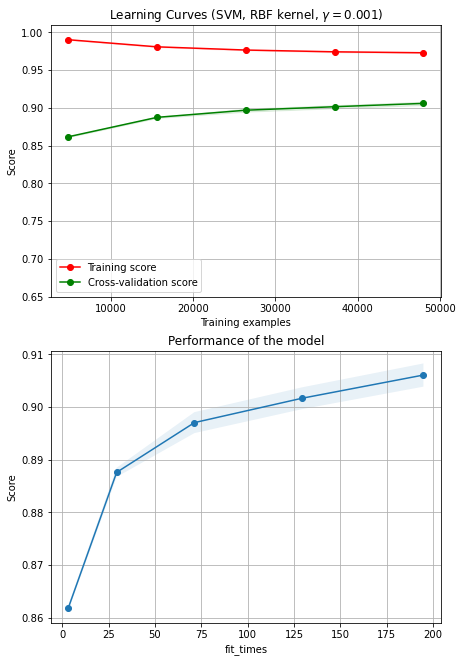

In [79]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot fit_time vs score
    axes[1].grid()
    axes[1].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[1].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(2, 1, figsize=(7, 11))

X, y = small_x_train, small_y_train


title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
plot_learning_curve(svm, title, X, y, axes=axes[:], ylim=(0.65, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [82]:
start = timeit.default_timer()

svm = SVC(kernel='rbf',C=10,random_state=42)

svm.fit(small_x_train,small_y_train)

pred = svm.predict(small_x_train)

print(classification_report(small_y_train, pred))

stop = timeit.default_timer()


print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6000
           1       1.00      1.00      1.00      6000
           2       0.95      0.95      0.95      6000
           3       0.97      0.98      0.97      6000
           4       0.94      0.95      0.95      6000
           5       1.00      1.00      1.00      6000
           6       0.94      0.91      0.92      6000
           7       0.98      0.99      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.99      0.99      6000

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

Time:  408.4228223


### Confusion Matrix on training set prediction

In [83]:
print(confusion_matrix(small_y_train, pred))

[[5792    0   20   45    1    0  140    0    2    0]
 [   0 5974    0   25    0    0    1    0    0    0]
 [  25    0 5706   22  184    0   63    0    0    0]
 [  28    0    9 5869   74    0   20    0    0    0]
 [   2    2  126   59 5710    0  101    0    0    0]
 [   0    0    0    0    0 5971    0   29    0    0]
 [ 283    2  115   56  107    0 5437    0    0    0]
 [   0    0    0    0    0    9    0 5958    0   33]
 [   0    1    1    0    1    0    2    1 5994    0]
 [   0    0    0    0    0    3    0   83    0 5914]]


## Παράδειγμα εσφαλμένης κατηγοριοποίησης

Example of wrong classification:
Predicted: = T-shirt/top
True value: = Pullover


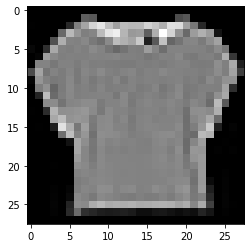

In [104]:
# Example of wrong classification

for i in range(len(pred)):
    if(pred[i]!=small_y_train[i]):
        c=i

print("Example of wrong classification:")
print("Predicted: = " + fashionmnist[str(pred[c])])
print("True value: = " + fashionmnist[str(small_y_train[c])])
image = small_x_train.iloc[c]
temp = np.array(image)
temp = np.reshape(temp, (28,28))
# plot the sample
fig = plt.figure
plt.imshow(temp, cmap='gray')
plt.show()

## Παράδειγμα σωστής κατηγοριοποίησης

Example of correct classification:
Predicted: = Sneaker
True value: = Sneaker


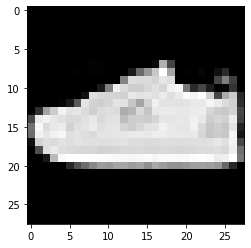

In [813]:
# Example of correct classification

for i in range(len(pred)):
    if(pred[i]==small_y_train[i]):
        c=i

print("Example of correct classification:")
print("Predicted: = " + fashionmnist[str(pred[c])])
print("True value: = " + fashionmnist[str(small_y_train[c])])
image = small_x_train.iloc[c]
temp = np.array(image)
temp = np.reshape(temp, (28,28))
# plot the sample
fig = plt.figure
plt.imshow(temp, cmap='gray')
plt.show()

# ΠΕΙΡΑΜΑΤΙΣΜΟΙ ΚΑΙ ΣΥΓΚΡΙΣΕΙΣ ΠΑΡΑΜΕΤΡΩΝ

## Πειραματισμός με διαφορετικα kernels ( συγκρίσεις ακρίβειας ως προς πλήθος training δεδομενων )

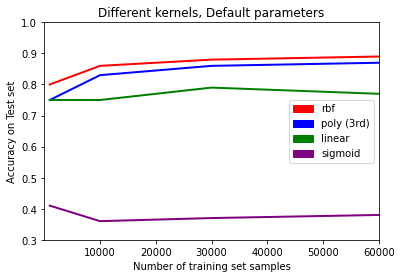

In [378]:
# EXPERIMENT NO.1

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [1000,10000,30000,60000] 

# corresponding y axis values 
no1 = [0.80,0.86,0.88,0.89] 
no2 = [0.75,0.83,0.86,0.87] 
no3 = [0.75,0.75,0.79,0.77]
no4 = [0.41,0.36,0.37,0.38]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 
plt.plot(x, no4, color='purple', linewidth = 2) 

red = mpatches.Patch(color='red', label='rbf')
blue = mpatches.Patch(color='blue', label='poly (3rd)')
green = mpatches.Patch(color='green', label='linear')
purple = mpatches.Patch(color='purple', label='sigmoid')
plt.legend(handles=[red,blue,green,purple])
  
# setting x and y axis range 
plt.ylim(0.3,1) 
plt.xlim(1,60000) 
  
# naming the x axis 
plt.xlabel('Number of training set samples') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('Different kernels, Default parameters') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικα kernels ( συγκρίσεις χρόνου ως προς πλήθος training δεδομενων )

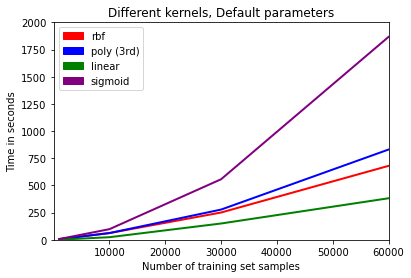

In [368]:
# EXPERIMENT NO.2

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [1000,10000,30000,60000] 

# corresponding y axis values 
no1 = [7,62,251,680] 
no2 = [5,62,278,830] 
no3 = [1,24,150,382]
no4 = [7,98,557,1866]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 
plt.plot(x, no4, color='purple', linewidth = 2) 

red = mpatches.Patch(color='red', label='rbf')
blue = mpatches.Patch(color='blue', label='poly (3rd)')
green = mpatches.Patch(color='green', label='linear')
purple = mpatches.Patch(color='purple', label='sigmoid')
plt.legend(handles=[red,blue,green,purple])
  
# setting x and y axis range 
plt.ylim(0,2000) 
plt.xlim(1,60000) 
  
# naming the x axis 
plt.xlabel('Number of training set samples') 
# naming the y axis 
plt.ylabel('Time in seconds') 
  
# giving a title to my graph 
plt.title('Different kernels, Default parameters') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικα kernels ( συγκρίσεις ακρίβειας ως προς διαφορετικό πλήθος διαστάσεων με μείωση PCA )

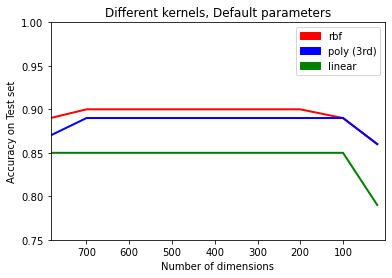

In [388]:
# EXPERIMENT NO.3

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [20,100,200,300,700,784] 

# corresponding y axis values 
no1 = [0.86,0.89,0.90,0.90,0.90,0.89] 
no2 = [0.86,0.89,0.89,0.89,0.89,0.87] 
no3 = [0.79,0.85,0.85,0.85,0.85,0.85]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='rbf')
blue = mpatches.Patch(color='blue', label='poly (3rd)')
green = mpatches.Patch(color='green', label='linear')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0.75,1) 
plt.xlim(784,1) 
  
# naming the x axis 
plt.xlabel('Number of dimensions') 
# naming the y axis 
plt.ylabel('Accuracy on Test set') 
  
# giving a title to my graph 
plt.title('Different kernels, Default parameters') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με διαφορετικα kernels ( συγκρίσεις χρόνου ως προς διαφορετικό πλήθος διαστάσεων με μείωση PCA )

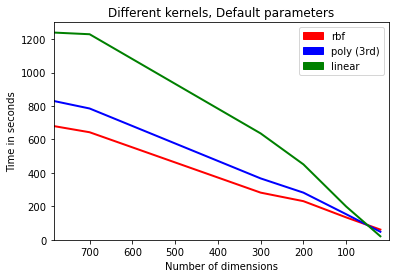

In [386]:
# EXPERIMENT NO.4

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
  
# x axis values 
x = [20,100,200,300,700,784] 

# corresponding y axis values 
no1 = [61,134,231,282,643,680] 
no2 = [48,153,282,367,785,830] 
no3 = [21,199,451,636,1229,1239]
  
# plotting the points  
plt.plot(x, no1, color='red', linewidth = 2) 
plt.plot(x, no2, color='blue', linewidth = 2) 
plt.plot(x, no3, color='green', linewidth = 2) 

red = mpatches.Patch(color='red', label='rbf')
blue = mpatches.Patch(color='blue', label='poly (3rd)')
green = mpatches.Patch(color='green', label='linear')
plt.legend(handles=[red,blue,green])
  
# setting x and y axis range 
plt.ylim(0,1300) 
plt.xlim(784,1) 
  
# naming the x axis 
plt.xlabel('Number of dimensions') 
# naming the y axis 
plt.ylabel('Time in seconds') 
  
# giving a title to my graph 
plt.title('Different kernels, Default parameters') 
  
# function to show the plot 
plt.show() 

## Πειραματισμός με παραμετροποίηση του C ( συγκρίσεις ακρίβειας για rbf kernel μοντέλα με διαφορετικό C )

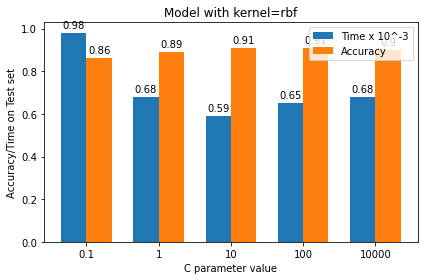

In [389]:
# EXPERIMENT NO.5

labels = ['0.1', '1', '10', '100', '10000']
time = [0.98, 0.68, 0.59, 0.65, 0.68]
accuracy = [0.86, 0.89, 0.91 , 0.91, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time, width, label='Time x 10^-3')
rects2 = ax.bar(x + width/2, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy/Time on Test set')
ax.set_xlabel('C parameter value')
ax.set_title('Model with kernel=rbf')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Πειραματισμός με παραμετροποίηση του polynomial degree ( συγκρίσεις ακρίβειας για polynomial kernel μοντέλα με διαφορετικό degree )

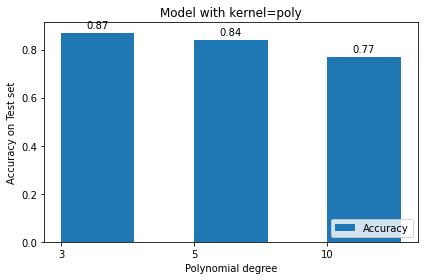

In [402]:
# EXPERIMENT NO.6

labels = ['3', '5', '10']
accuracy = [0.87, 0.84, 0.77]

x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy on Test set')
ax.set_xlabel('Polynomial degree')
ax.set_title('Model with kernel=poly')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=4)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)

fig.tight_layout()

plt.show()

## Πειραματισμός με διαφορετικά kernels ( συγκρίσεις ακρίβειας μεταξύ training set και test set )

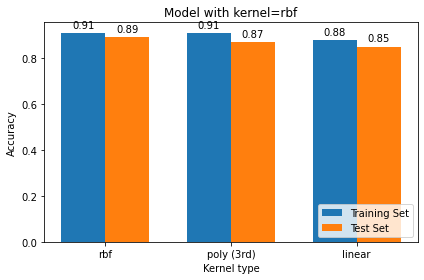

In [403]:
# EXPERIMENT NO.7

labels = ['rbf', 'poly (3rd)', 'linear']
test = [0.89, 0.87, 0.85]
train = [0.91, 0.91, 0.88]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train, width, label='Training Set')
rects2 = ax.bar(x + width/2, test, width, label='Test Set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Kernel type')
ax.set_title('Model with kernel=rbf')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=4)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Πειραματισμός με διαφορετικά gamma parameter values σε μοντέλο με kernel rbf ( συγκρίσεις ακρίβειας )

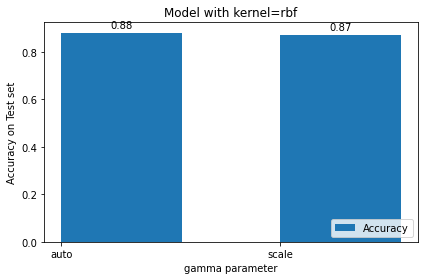

In [23]:
# EXPERIMENT NO.8

labels = ['auto', 'scale']
accuracy = [0.88,0.87]

x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy on Test set')
ax.set_xlabel('gamma parameter')
ax.set_title('Model with kernel=rbf')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=4)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2)

fig.tight_layout()

plt.show()